请输入N：代表输出的数字个数30
曹操        1425 
孔明        1373 
刘备        1223 
关羽        779  
张飞        348  
主公        327  
吕布        300  
引兵        283  
孙权        264  
天下        255  
赵云        255  
东吴        251  
不敢        235  
魏兵        233  
陛下        223  
司马懿       221  
都督        218  
周瑜        217  
汉中        212  
众将        209  
只见        202  
后主        200  
袁绍        190  
蜀兵        190  
马超        185  
夏侯        184  
大叫        180  
上马        179  
魏延        177  
此人        174  


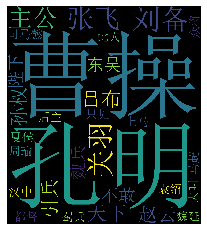

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba
import numpy as np
from PIL import Image

def txt():  #输出词频前N的词语并且以str的形式返回
    txt = open("三国演义.txt","r").read() #打开txt文件,要和python在同一文件夹
    words = jieba.lcut(txt)  #精确模式，返回一个列表
    counts = {}  #创建字典
    excludes = ("将军","二人","却说","荆州","不可","不能","如此","如何",\
                "军士","左右","军马","商议","大喜","今日","次日","于是","一人","不知","人马") #规定要去除的没意义的词语
    for word in words:
        if len(word) == 1:                          #把意义相同的词语归一
            continue
        elif word == "诸葛亮" or word == "孔明曰":
            rword = "孔明"
        elif word == '关公' or word == '云长':
            rword = '关羽'
        elif word == '玄德' or word == '玄德曰':
            rword = '刘备'
        elif word == '孟德' or word == "丞相" or word == '曹躁':
            rword = '曹操'
        else:
            rword = word
        counts[rword] = counts.get(rword,0) + 1     #字典的运用，统计词频P167
    for word in excludes: #删除之前所规定的词语
        del(counts[word])
    items = list(counts.items())   #返回所有键值对P168
    items.sort(key=lambda x:x[1], reverse =True) #降序排序
    N =eval(input("请输入N：代表输出的数字个数"))
    wordlist=list()
    for i in range(N):
        word,count = items[i]
        print("{0:<10}{1:<5}".format(word,count)) #输出前N个词频的词语
        wordlist.append(word)    #把词语word放进一个列表
    a=' '.join(wordlist)  #把列表转换成str wl为str类型，所以需要转换
    return a 

def create_word_cloud(filename):
    wl = txt() #调用函数获取str！！
                                    #图片名字 需一致
    #cloud_mask = np.array(Image.open("love.jpg"))#词云的背景图，需要颜色区分度高

    wc = WordCloud(
        background_color = "black", #背景颜色
        #mask = cloud_mask,          #背景图cloud_mask
        max_words=100,              #最大词语数目
        font_path = 'simsun.ttf',   #调用font里的simsun.tff字体，需要提前安装
        height=1800,                #设置高度
        width=1600,                 #设置宽度
        max_font_size=1000,         #最大字体号
        random_state=1000,          #设置随机生成状态，即有多少种配色方案
        )

    myword = wc.generate(wl)  # 用 wl的词语 生成词云
    # 展示词云图
    plt.imshow(myword)
    plt.axis("off")
    plt.show()
    wc.to_file('1.jpg')  # 把词云保存下当前目录（与此py文件目录相同）



 
 
if __name__ == '__main__':
    create_word_cloud('三国演义')